# STAT 440 Statistical Data Management - Fall 2021
## Week 06 Notes
### Created by Christopher Kinson and Huiqin Xin

***


### Table of Contents

- [Loops and conditional execution](#loops-and-conditional-execution)  
  - [Conditional execution](#conditional-execution)  
  - [Loops](#loops)  
    - [Index-controlled loops: `for` loop](#index-controlled)
    - [Condition-controlled loops: `while` loop](#condition-controlled-while)
    - [Condition-controlled loops: `repeat` loop](#condition-controlled-repeat)
- [map and apply](#map-apply)  
  - [Why?](#why)  
- [Vectorization](#vectorization)


***




## <a name="loops-and-conditional-execution"></a>Loops and Conditional Execution

### <a name="conditional-execution"></a>Conditional Execution

The `if` statement requires a TRUE logical condition (expression) in order for the expressions to run. Multiple expressions, i.e. grouped expressions can be used. Multiple conditions can be combined with logical operator `and` or `or`. The else is used if the user intends for an alternative set of expressions to be executed when the logical condition is FALSE.


```
if condition:
    expressions
else:
    expressions

if condition:
    expressions
elif condition:
    expressions
elif condition:
    expressions
else:
    expressions

if condition1 and condition2:
    expressions
else:
    expressions
```

### <a name="loops"></a>Loops

![](https://media.giphy.com/media/zA9wlONvvIorC/giphy.gif)

We use loops:  

- when we want to do repetitive actions on observations

    - the repetitive actions happen in the loop body  

- to show how values change over iterations

- because we want efficient coding  

- within loops, called nested loops, for more complicated calculations

There are 2 main type of loops:  

- **index-controlled** loops  

    - actions are repeated for a predetermined number of times using an index or counter  
- **condition-controlled** loops  

    - actions are repeated once a condition is satisfied  

    - condition checked at the bottom or at top of the loop

#### The for loop (index-controlled)

![](https://uofi.box.com/shared/static/pu35sgyu0pqeesuuzrspij6famx4ba9e.png)

The index is determined by the expression and changes each time the grouped expressions execute until the index reaches the maximum value of the expression. To stop the for loop, we must smartly utilize the dimension of the expression.



```
for index in expression:
    expressions
   ```

In [7]:
import numpy as np
import pandas as pd

In [8]:
for i in range(6):
    print(np.array(range(i+1)))

[0]
[0 1]
[0 1 2]
[0 1 2 3]
[0 1 2 3 4]
[0 1 2 3 4 5]


In [9]:
ab = None
matrix1 = np.random.normal(0,1,(100,2))
# print(matrix1)
for i in range(10):
    if ab is not None: 
        ab=np.concatenate((ab, matrix1[(10*i):(10*(i+1))]),axis=0)
    else:
        ab= matrix1[(10*i):(10*(i+1))]
ab[:10]

array([[-0.15752883, -0.91706809],
       [-0.61456729, -0.84304565],
       [-1.64523415, -1.98777515],
       [ 0.62608074, -0.31556277],
       [ 0.17771124, -0.29295936],
       [-2.37435164,  0.79823961],
       [ 0.36004517, -0.4654101 ],
       [ 0.2154657 , -0.76446214],
       [ 1.17058077, -0.80257374],
       [-1.55383973,  0.32635703]])

In [10]:
x = [i for i in range(20)]
for i in range(20):
    if x[i] % 2==0:
        x[i] = -x[i]
x

[0, 1, -2, 3, -4, 5, -6, 7, -8, 9, -10, 11, -12, 13, -14, 15, -16, 17, -18, 19]

In [11]:
nc = 8 
nr = 8
mat = [[0 for j in range(nc)] for i in range(nr)]
for i in range(nr):
    for j in range(nc):
        z = np.random.normal()
        if abs(z)>1:
            mat[i][j]=z
mat

[[0, 0, 0, 0, 1.6888016667371213, -1.3300182128996376, 0, 0],
 [0, -1.0812114361039638, 0, 0, 0, 0, 0, 0],
 [1.5492405032113374,
  0,
  -1.1559227029022303,
  2.010219629460384,
  0,
  1.0445333127286223,
  1.1924203502826034,
  0],
 [0, 1.4303588956392677, 0, 0, 0, 0, -1.0866046466811308, 0],
 [0, -1.3791531228023877, 0, 0, 1.2765126883182925, 0, 0, 0],
 [2.478162963183193,
  0,
  0,
  -2.246094727876841,
  0,
  -1.2128762045587838,
  0,
  -1.9888081299366096],
 [0, 0, 0, 0, 0, 1.1343262863727452, 0, 0],
 [0,
  0,
  0,
  1.7667354531709256,
  1.684833119849793,
  1.4233962513668892,
  -1.4603770719603728,
  -1.275121667948347]]

#### <a name="condition-controlled-while"></a> Condition-controlled Loops 1
![](https://uofi.box.com/shared/static/gmrkhaq7rgyklw1tvqrepveo2rivj8cm.png)

The logical condition should be TRUE at the very beginning before the grouped expressions can be repeated. Once the condition is FALSE, the loop stops.

```
while condition:
    expressions
    index += 1
```

Some examples of the while loop.

In [12]:
cond = True
i=1
np.random.seed(13)
while cond:
    u = np.random.uniform(0,1,1)
    if u<1/10:
        cond =False
    print('Iteration: %d, unif: %f \n' % (i,u))
    i+=1

Iteration: 1, unif: 0.777702 

Iteration: 2, unif: 0.237541 

Iteration: 3, unif: 0.824279 

Iteration: 4, unif: 0.965749 

Iteration: 5, unif: 0.972601 

Iteration: 6, unif: 0.453449 

Iteration: 7, unif: 0.609042 

Iteration: 8, unif: 0.775527 

Iteration: 9, unif: 0.641613 

Iteration: 10, unif: 0.722018 

Iteration: 11, unif: 0.035037 



In [13]:
x,precision = 0.001,0.001
while np.random.gamma(1,1)<0.95:
    x = x + precision
x


0.003

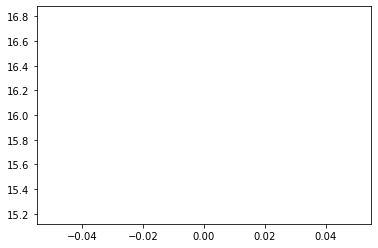

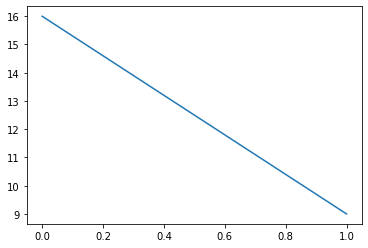

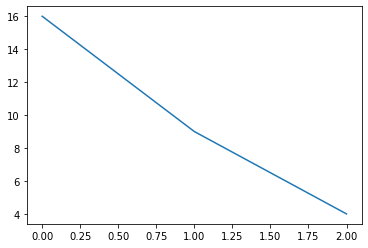

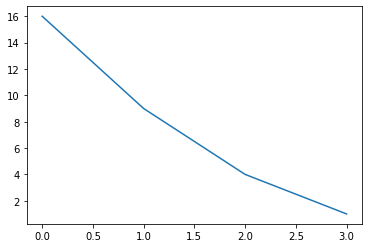

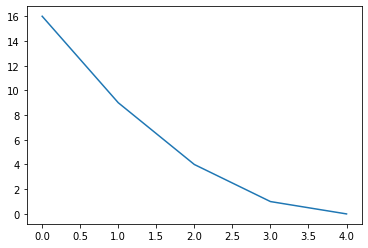

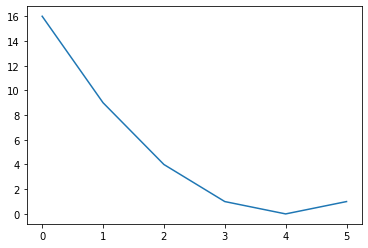

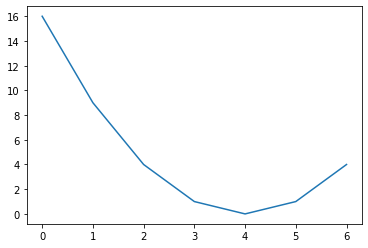

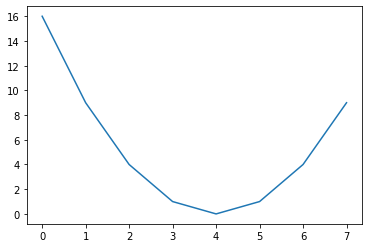

In [14]:
import matplotlib.pyplot as plt
y = [i for i in range(16)]
i = 0
while y[i]<8:
    plt.plot(y[:(i+1)], list(map(lambda x: (x-4)**2,y[:(i+1)]) ))
    plt.show()
    i+=1


#### <a name="condition-controlled-while2"></a> Condition-controlled Loops 2

<img src='https://uofi.box.com/shared/static/vqi9zzrj252sbma0d54x29pt0g6d9u28.png'>

The grouped expressions execute until the condition is TRUE. When the condition is TRUE, the `break` statement provides the end and exit of the loop. Without the `break`, the loop never stops.
```
while True: 
    expressions
    index += 1
    if condition:
        break
```
***

Some examples of the repeat loop.

In [15]:
np.random.seed(13)
i = 0
while True:
    print(i)
    i += 1
    if np.random.uniform(0,1,1) < 1/100:
        break

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [16]:
from scipy.stats import gamma
precision = 0.0001
x = 0.001 
while True:
    x +=  precision
    if gamma.cdf(x, 1) > 0.95:
        break
x

2.9958000000018976

## <a name="map-apply"></a>map and apply

In python, we use map (on iterable) and apply (on pandas.DataFrame) function to simplify complicated *for loop* coding.

![](https://media1.tenor.com/images/f552638ff2e4099790a44c1ccf245301/tenor.gif?itemid=3965570)




### <a name="why"></a>Why?

Similar to apply functions in R code, map and apply function has its priority comparing to *for loop*.

- Allow one to write **literate** code. On the other hand, *for loops* are not very expressable, i.e. they take a lot of code to do what you want.
- *for loops* permit you to write bad code.
- variables created in the *for loop* are stored in the global environment, which is dangerous.

Here is an example to show the advantage of apply function on processing DataFrame.

In [17]:
from sklearn.datasets import load_iris
iris = load_iris()
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
## for loop 
n = 100 # constant global variable that I want to keep set as stated
for i in iris.target.unique():
    n = iris[iris.target == i]
    print(n['petal length (cm)'].mean())

n.head() # my constant global variable changed

1.4620000000000002
4.26
5.5520000000000005


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2.0
101,5.8,2.7,5.1,1.9,2.0
102,7.1,3.0,5.9,2.1,2.0
103,6.3,2.9,5.6,1.8,2.0
104,6.5,3.0,5.8,2.2,2.0


In [18]:
## Using map function
n = 100 # constant global variable that I want to keep set as stated
foo = [iris[iris.target==i] for i in iris.target.unique()] # The split–apply–combine pattern
print(list(map(lambda n:  n['petal length (cm)'].mean() , foo)))
print(n) # unaffected

[1.4620000000000002, 4.26, 5.5520000000000005]
100


In [19]:
## Using apply function
n = 100 # constant global variable that I want to keep set as stated
# foo = [iris[iris.target==i] for i in iris.target.unique()] # The split–apply–combine pattern
print(iris.apply(np.mean)) 
print(n) # unaffected

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
target               1.000000
dtype: float64
100


Pandas also allows you to use some simple function on DataFrame directly to achieve the same goal, like DataFrame.mean(), DataFrame.sum(), DataFrame.avg() and so on.

In [20]:
## Using apply function
n = 100 # constant global variable that I want to keep set as stated
# foo = [iris[iris.target==i] for i in iris.target.unique()] # The split–apply–combine pattern
print(iris.mean()) 
print(n) # unaffected

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
target               1.000000
dtype: float64
100


### map function

- works on iterable (list, tuple etc.) 
- func should be the function we want to apply to the iterable
```
map(fun, iter)
```

In [21]:
abc = [[i for i in range(9)],[i for i in range(10)]]
list(map(sum,abc))

[36, 45]

In [22]:
l = [i for i in range(6)]
list(map(lambda x: print([i for i in range(x+1)]),l))

[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]


[None, None, None, None, None, None]

### apply function
- works on pandas.DataFrame
- axis is the dimension in which the function is applied, axis=0 means function by column, axis=1 means function by row, default value is 0.
- func should be the function we want to apply to the DataFrame

```
DataFrame.apply(func,axis,...)
```

In [23]:
iris.drop(columns = 'target').apply(lambda x: x.sum()/len(x), axis=0)

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

It is the same as

In [24]:
iris.drop(columns = 'target').mean()

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

*Why don't we use *`iris.apply(lambda x: x.sum()/len(x), axis=0)`*?*

***
## <a name="sapply"></a>Vectorization

Vectorization is a concept that will surely speed up computing time (compared to traditional loops) and works to optimize repeated operations. Vectorization occurs when a function or operation takes a vector of values as input, completes the function or operation on each element of the vector, and returns a vector (the same length as the input vector).

Summarization occurs when a function or operation takes a vector as input, completes the function or operation, and returns a single value (effectively a summarized value). We discuss summarizing data in Week 10.

Arithmetic operators are vectorized in numpy.array.

Here are some vectorized functions in numpy: `absolute`, `isnan()`, `sqrt()`, `log()`, `absolute()`. The `ifelse()` function is probably my favorite, because it combines logical operators, loops, and conditional execution to create a single vectorized function.

The code below shows an advantage in coding efficiency and readability through the use of vectorization.

In [25]:
import numpy as np
#not vectorized
np.random.seed(13)
n = 10
zz = np.array([' '*4]*n)
for i in range(n):
    z = np.random.normal(size=1)
    if abs(z) > 1:
        zz[i] = 'Yes!'
print(zz)


['    ' '    ' '    ' '    ' 'Yes!' '    ' 'Yes!' '    ' 'Yes!' 'Yes!']


In [26]:
#vectorized
np.random.seed(13)
z = np.random.normal(size=10)
zz[np.absolute(z)>1] = 'Yes!'
print(zz)

['    ' '    ' '    ' '    ' 'Yes!' '    ' 'Yes!' '    ' 'Yes!' 'Yes!']


Working with the City Recall the City of Urbana's [Rental Inspection Grades Listing Data as the original JSON file from the city's website](https://github-dev.cs.illinois.edu/stat440-fa21/stat440-fa21-course-content/raw/master/data/rental-inspections-grades-data06.json), we can finally discuss how to get the information we want: the 1730 rows and 7 columns about the rental properties. One sure-way to do this is to use a `for` loop and we can combine this idea with `if else` statement.

In [28]:
import urllib.request, json 
with urllib.request.urlopen("https://raw.github-dev.cs.illinois.edu/stat440-fa21/stat440-fa21-course-content/master/data/rental-inspections-grades-data06.json?token=AAABJG234X7BMQKLP3OEZ63BJIWJA") as url:
    data = json.loads(url.read().decode())

In [29]:
data.keys()

dict_keys(['meta', 'data'])

In [30]:
import pandas as pd
rd2 = pd.DataFrame(data['data'])
rd2.iloc[1729,8]

'1503 South Cottage Grove Avenue'

In [31]:
rd2.iloc[1729,9]

'922116353022'

In [32]:
rd2.iloc[1729,10]

'2016-05-18T00:00:00'

In [33]:
rd2.iloc[1729,11]

'Class B'

In [34]:
rd2.iloc[1729,12]

'Expired'

In [35]:
rd2.iloc[1729,13]

In [36]:
rd2.iloc[1729,14]

['{"address": "1503 South Cottage Grove Avenue", "city": "Urbana", "state": "IL", "zip": ""}',
 '-88.1959',
 '40.0996',
 None,
 False]

In [37]:
rd3 = pd.DataFrame(index=range(len(rd2)), columns= ['property_address','parcel_number','inspection_date','grade','license_status',
                             'expiration_date','mappable_address'])
for i in range(len(rd2)):
    for j in range(6):       
        rd3.iloc[i,j] = '' if rd2.iloc[i,j+8]!=rd2.iloc[i,j+8] else rd2.iloc[i,j+8]

    rd3.iloc[i,6] = '|'.join(s for s in rd2.iloc[i,14][:3] if s)
    
rd3.head()

,property_address,parcel_number,inspection_date,grade,license_status,expiration_date,mappable_address
0,607 1/2 Glover Avenue,922116177018,2015-07-24T00:00:00,Class B,Expired,2021-10-14T00:00:00,"{""address"": ""607 1 2 Glover Avenue"", ""city"": ""..."
1,1302 1/2 Hill Street,912107406011,2011-08-17T00:00:00,Class B,Issued,2021-10-14T00:00:00,"{""address"": ""1302 1 2 Hill Street"", ""city"": ""U..."
2,503 Sunny Lane,912115180034,2015-03-26T00:00:00,Class A,Issued,2019-10-14T00:00:00,"{""address"": ""503 Sunny Lane"", ""city"": ""Urbana""..."
3,212 1/2 Central Avenue,912108383001,2010-04-26T00:00:00,Class B,Issued,None,"{""address"": ""212 1 2 Central Avenue"", ""city"": ..."
4,801 1/2 East Harding Drive,932121153003,2013-06-12T00:00:00,Class B,Issued,2021-10-14T00:00:00,"{""address"": ""801 1 2 East Harding Drive"", ""cit..."


We can accomplish this same thing with an `apply()` and `if else` condition statement.

In [38]:
def f(item):
    l = ['']*7
    for j in range(6):
        l[j] = '' if item[j+8]!=item[j+8] else item[j+8]
    l[6] = '|'.join(s for s in item[14][:3] if s)
    return l
rd4 = rd2.apply(f,axis=1)
rd4.head()

0    [607 1/2 Glover Avenue, 922116177018, 2015-07-...
1    [1302 1/2 Hill Street, 912107406011, 2011-08-1...
2    [503 Sunny Lane, 912115180034, 2015-03-26T00:0...
3    [212 1/2 Central Avenue, 912108383001, 2010-04...
4    [801 1/2 East Harding Drive, 932121153003, 201...
dtype: object

#### END OF NOTES